In [7]:
# Bibliotheken installieren (falls noch nicht vorhanden)
!pip install yfinance pandas matplotlib

# Notwendige Bibliotheken importieren
import yfinance as yf         # Bibliothek für Yahoo Finance Daten4
import pandas as pd          # Datenanalyse und -bearbeitung5
import matplotlib.pyplot as plt  # Visualisierung
from datetime import datetime   # Datum und Uhrzeit-Funktionen

# Hinweis: yfinance stellt kostenlos historische Marktdaten über Yahoo Finance bereit67.

In [8]:
# Zeitpunkt berechnen: heute und vor 6 Monaten
heute = pd.Timestamp.today()                 # aktuelles Datum und Uhrzeit
start_date = heute - pd.DateOffset(months=6) # genau 6 Monate zurück
start_str = start_date.strftime("%Y-%m-%d")  # Formatieren als "YYYY-MM-DD"
end_str = heute.strftime("%Y-%m-%d")

print(f"Zeitraum: {start_str} bis {end_str}")

Zeitraum: 2025-05-18 bis 2025-11-18


In [9]:
# Historische Kursdaten abrufen
# Wir laden die täglichen Schlusskurse (Close) der letzten 6 Monate
ticker_nvda = "NVDA"
ticker_tsla = "TSLA"

# Daten für NVDA herunterladen (OHLCV: Open, High, Low, Close, Volume)
df_nvda = yf.download(ticker_nvda,
                      start=start_str,
                      end=end_str,
                      interval="1d",
                      progress=False)

# Daten für TSLA herunterladen
df_tsla = yf.download(ticker_tsla,
                      start=start_str,
                      end=end_str,
                      interval="1d",
                      progress=False)

# Überprüfung: Zeige jeweils die ersten Zeilen
print(df_nvda.head(3))
print(df_tsla.head(3))


Price            Close        High         Low        Open     Volume
Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
Date                                                                 
2025-05-19  135.552948  135.852898  132.373340  132.373340  193154600
2025-05-20  134.363083  134.563055  132.603295  134.273083  161514200
2025-05-21  131.783417  137.382703  130.573562  133.043253  270608700
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2025-05-19  342.089996  343.000000  333.369995  336.299988   88869900
2025-05-20  343.820007  354.989990  341.630005  347.869995  131715500
2025-05-21  334.619995  347.350006  332.200012  344.429993  102354800


C:\Users\18284\AppData\Local\Temp\ipykernel_28820\2155441030.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_nvda = yf.download(ticker_nvda,
C:\Users\18284\AppData\Local\Temp\ipykernel_28820\2155441030.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tsla = yf.download(ticker_tsla,


In [10]:
# Nur die Schlusskurse behalten und Spalte umbenennen
df_nvda = df_nvda[["Close"]].rename(columns={"Close": "Schlusskurs"})
df_tsla = df_tsla[["Close"]].rename(columns={"Close": "Schlusskurs"})

# Datumsindex umbenennen (optional, für Klarheit)
df_nvda.index.name = "Datum"
df_tsla.index.name = "Datum"

# Ausgabe der bereinigten DataFrames
display(df_nvda.head(3))
display(df_tsla.head(3))

Price,Schlusskurs
Ticker,NVDA
Datum,
2025-05-19,135.552948
2025-05-20,134.363083
2025-05-21,131.783417


Price,Schlusskurs
Ticker,TSLA
Datum,
2025-05-19,342.089996
2025-05-20,343.820007
2025-05-21,334.619995


In [11]:
# (Optional) Daten exportieren
# Als CSV-Dateien speichern
df_nvda.to_csv("NVDA_schlusskurse.csv", index=True)
df_tsla.to_csv("TSLA_schlusskurse.csv", index=True)

# Als JSON-Dateien speichern (Datum im ISO-Format)
df_nvda.to_json("NVDA_schlusskurse.json", orient="records", date_format="iso")
df_tsla.to_json("TSLA_schlusskurse.json", orient="records", date_format="iso")

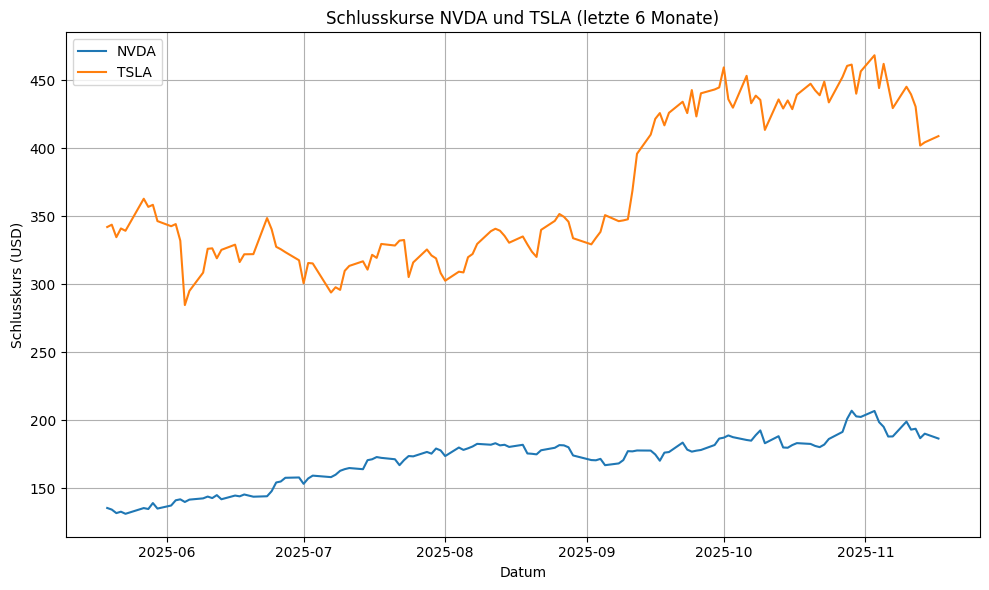

In [12]:
# (Optional) Visualisierung der Kursentwicklung
plt.figure(figsize=(10, 6))
plt.plot(df_nvda.index, df_nvda["Schlusskurs"], label="NVDA")
plt.plot(df_tsla.index, df_tsla["Schlusskurs"], label="TSLA")
plt.title("Schlusskurse NVDA und TSLA (letzte 6 Monate)")
plt.xlabel("Datum")
plt.ylabel("Schlusskurs (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()